In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# import labelencoder from sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder
# feature selection method using chi2 for categorical output, categorical input
from sklearn.feature_selection import SelectKBest, chi2
# import the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score

In [2]:
# using pandas read_csv function to load the dataset
df = pd.read_csv("./RTA Dataset.csv")
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [40]:
from datetime import datetime

df['Hour_of_Day'] = df['Time'].apply(
    lambda x: pd.to_datetime(x, format='%H:%M:%S').hour
)

In [41]:
df.shape

(12316, 33)

In [42]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties,Hour_of_Day
count,12316.000000,12316.000000,12316.000000
mean,2.040679,1.548149,13.835823
std,0.688790,1.007179,5.202923
min,1.000000,1.000000,0.000000
25%,2.000000,1.000000,10.000000
50%,2.000000,1.000000,15.000000
75%,2.000000,2.000000,18.000000
max,7.000000,8.000000,23.000000


In [43]:
df.isnull().sum().sort_values(ascending=False)

Defect_of_vehicle              4427
Service_year_of_vehicle        3928
Work_of_casuality              3198
Fitness_of_casuality           2635
Type_of_vehicle                 950
Types_of_Junction               887
Driving_experience              829
Educational_level               741
Vehicle_driver_relation         579
Owner_of_vehicle                482
Lanes_or_Medians                385
Vehicle_movement                308
Area_accident_occured           239
Road_surface_type               172
Type_of_collision               155
Road_allignment                 142
Sex_of_casualty                   0
Pedestrian_movement               0
Cause_of_accident                 0
Accident_severity                 0
Casualty_severity                 0
Age_band_of_casualty              0
Time                              0
Road_surface_conditions           0
Casualty_class                    0
Number_of_casualties              0
Number_of_vehicles_involved       0
Weather_conditions          

In [7]:
df.duplicated().sum()

0

In [44]:
df['Accident_severity'].value_counts()

Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: Accident_severity, dtype: int64

<Axes: title={'center': 'Accident severity Count'}, xlabel='Accident_severity', ylabel='count'>

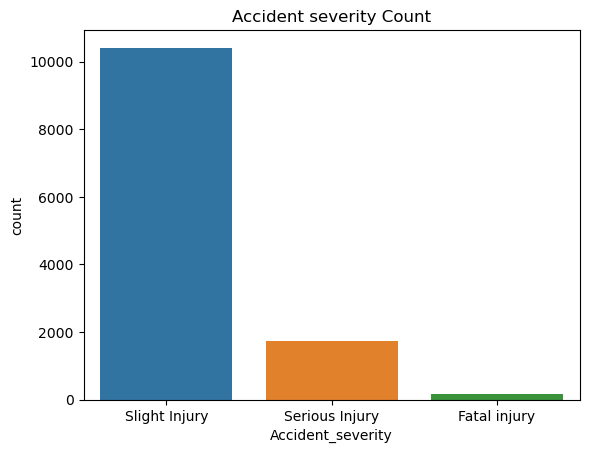

In [45]:
plt.title('Accident severity Count')
sns.countplot(x='Accident_severity', data=df)

<Figure size 1200x0 with 0 Axes>

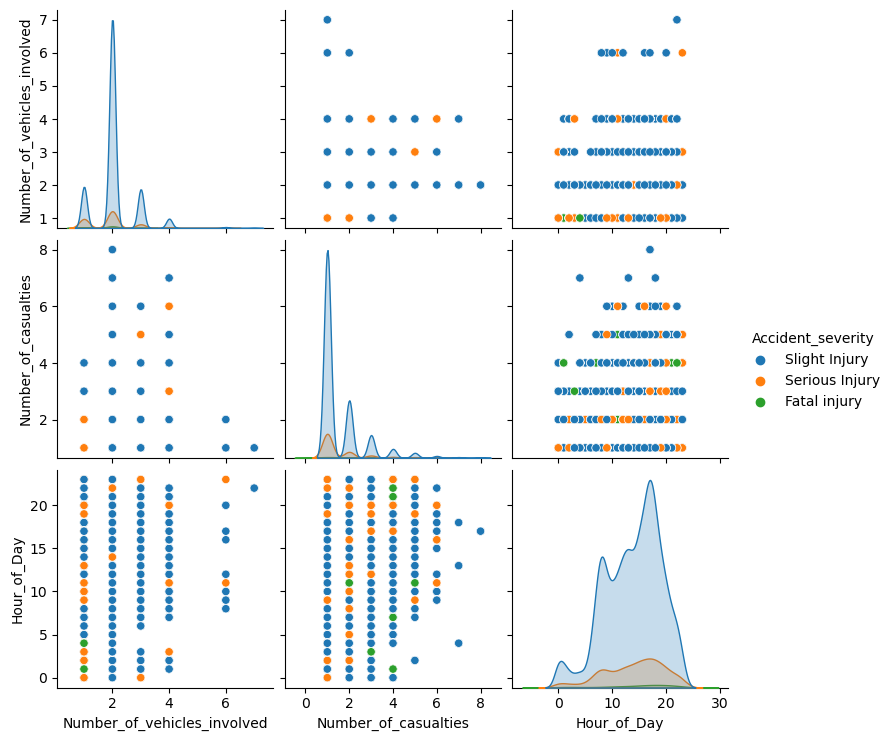

In [46]:
plt.figure(figsize=(12, 0))
sns.pairplot(df, hue='Accident_severity')

<Axes: >

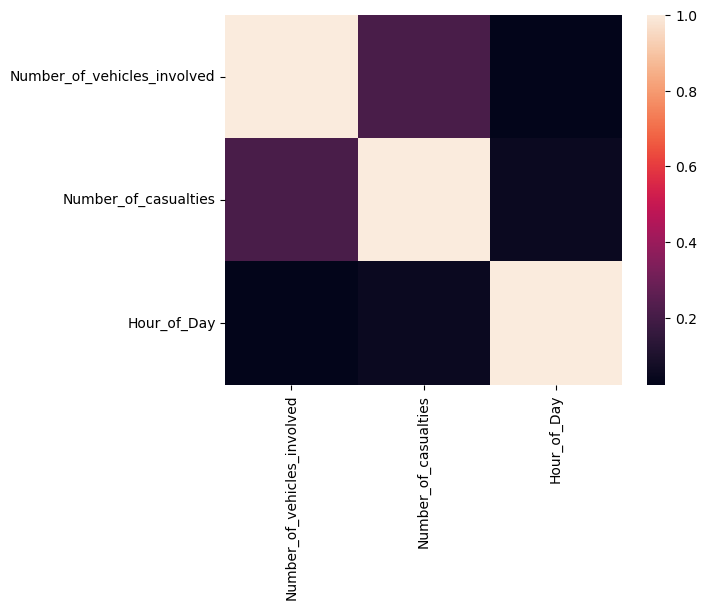

In [47]:
sns.heatmap(df.corr(numeric_only=True))

In [48]:
df["Educational_level"].value_counts()

Junior high school    7619
Elementary school     2163
High school           1110
Above high school      362
Writing & reading      176
Unknown                100
Illiterate              45
Name: Educational_level, dtype: int64

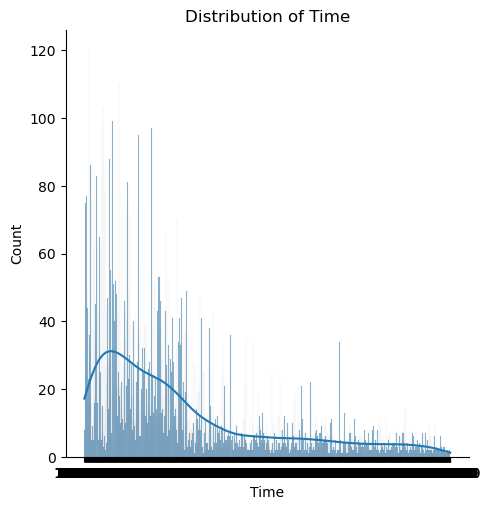

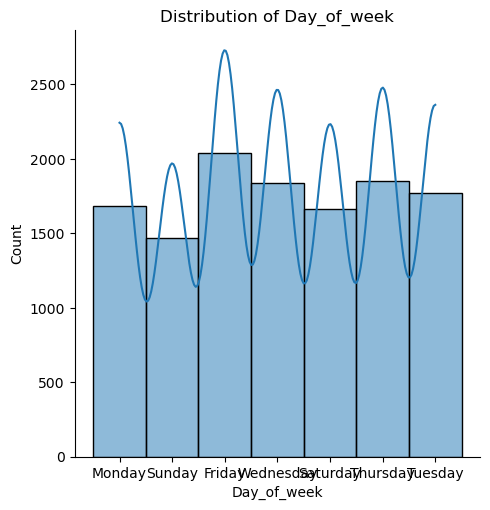

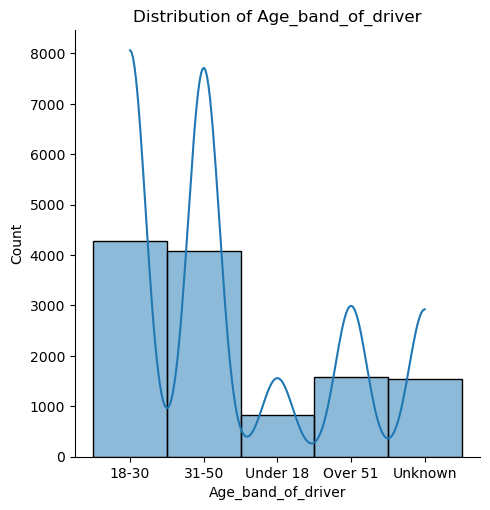

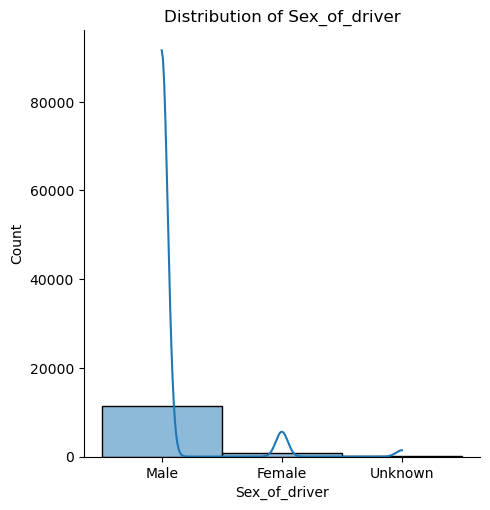

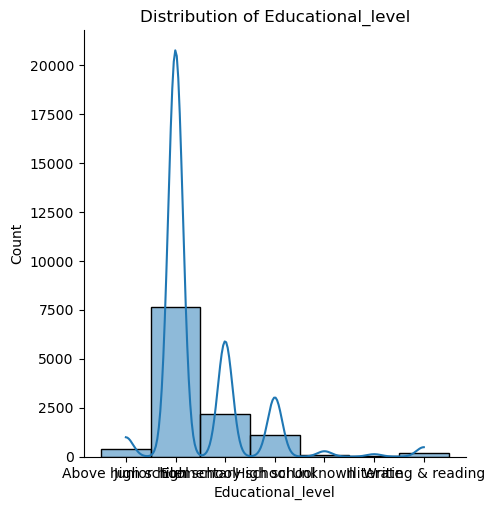

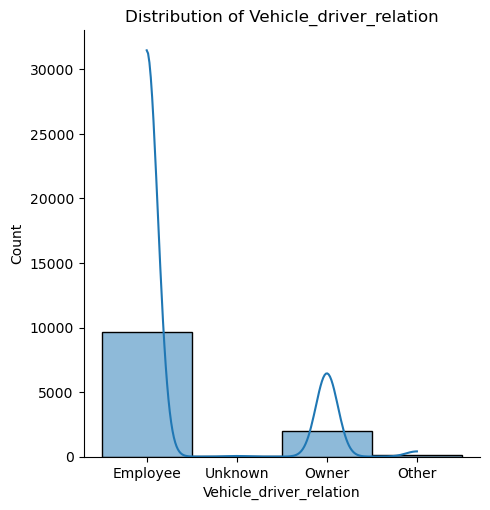

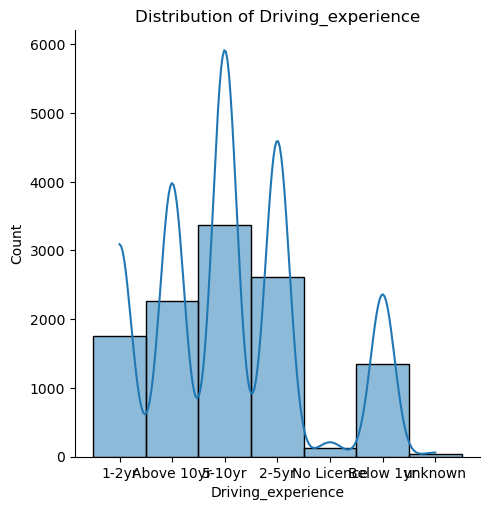

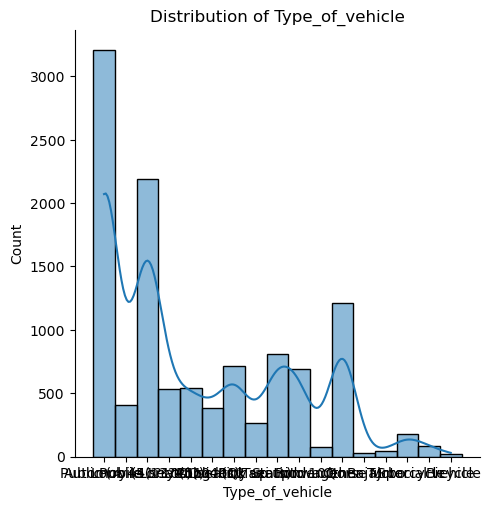

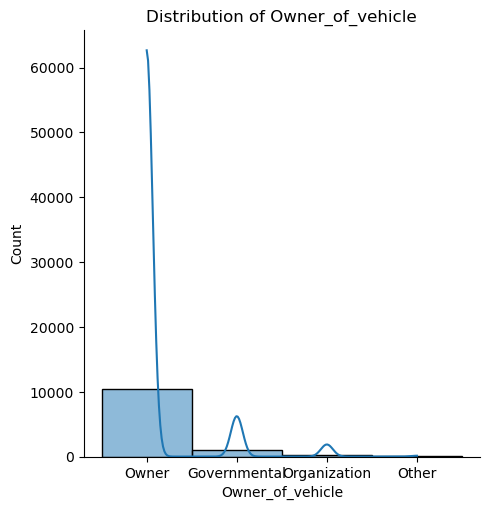

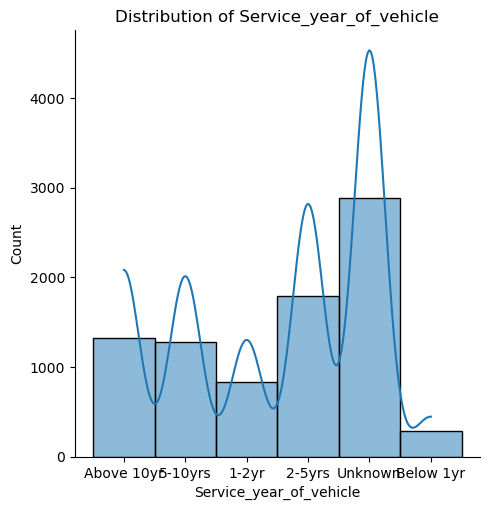

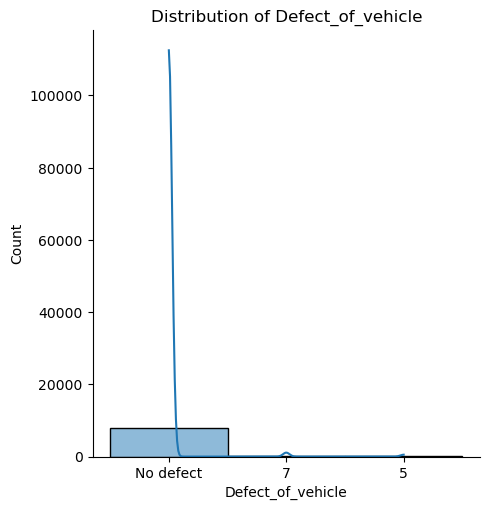

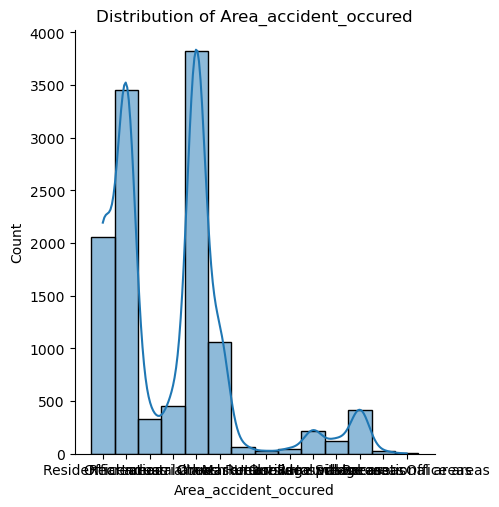

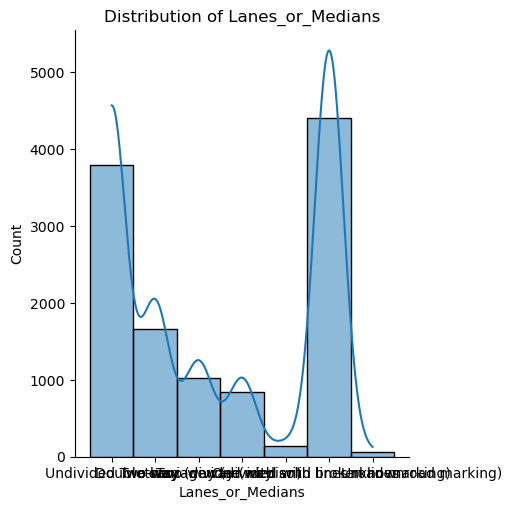

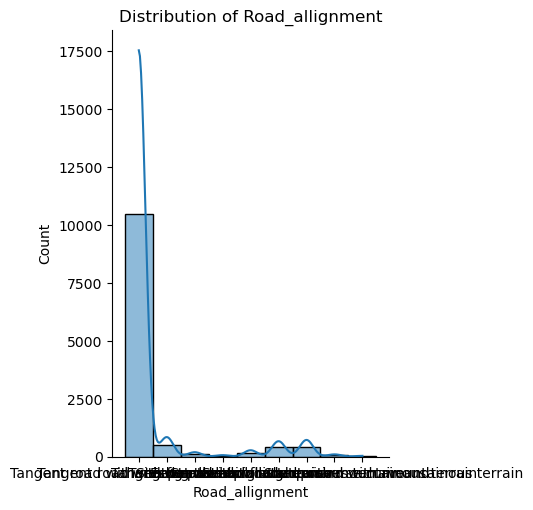

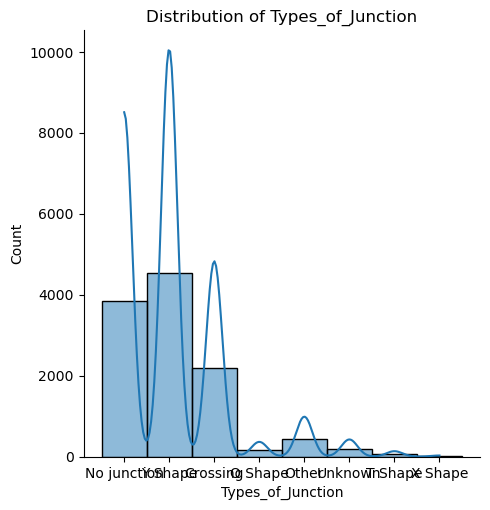

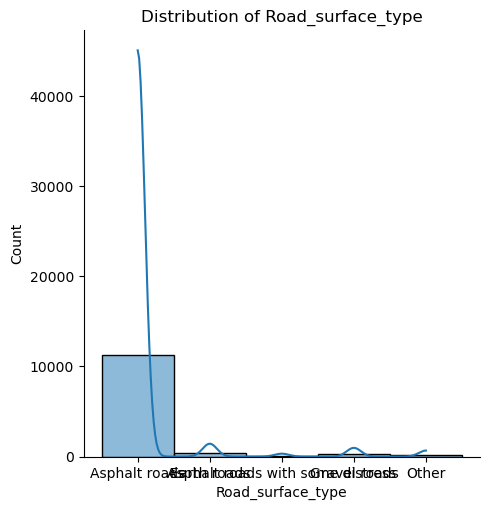

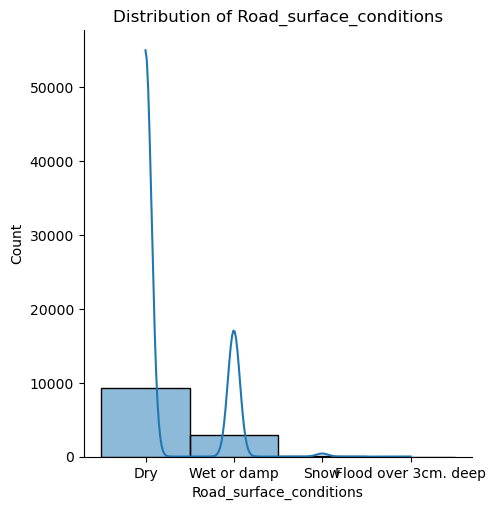

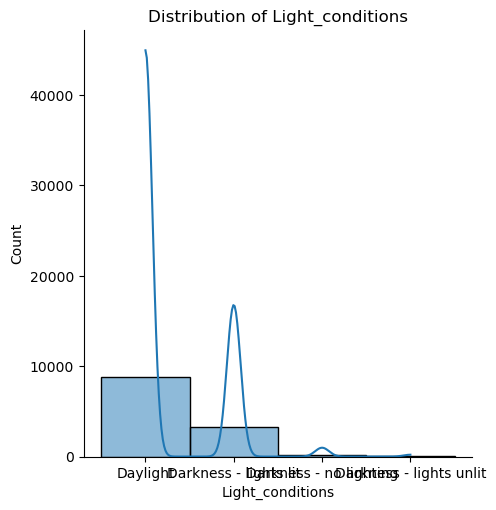

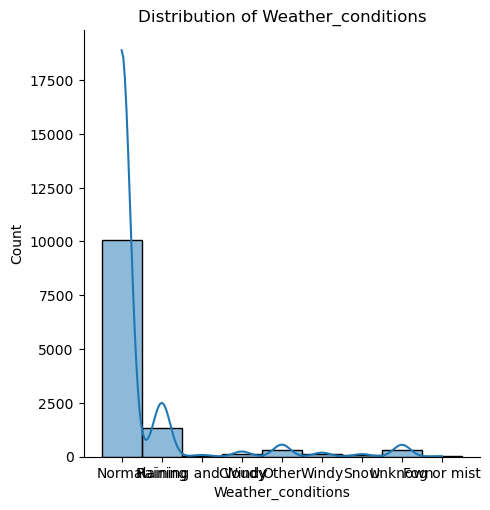

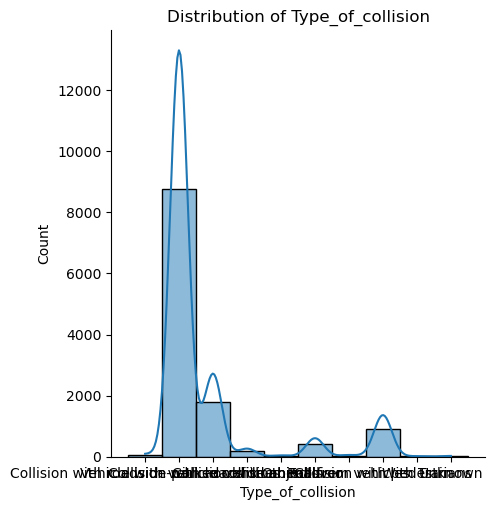

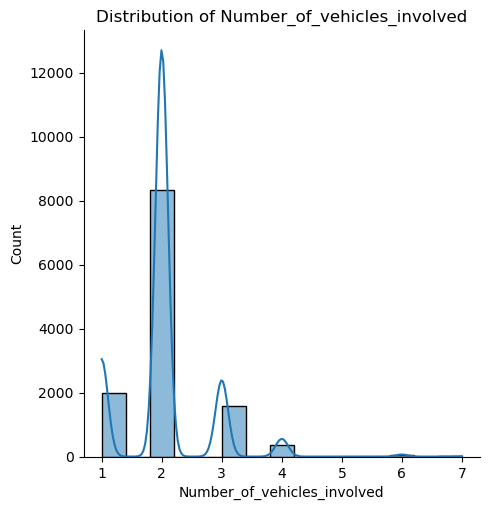

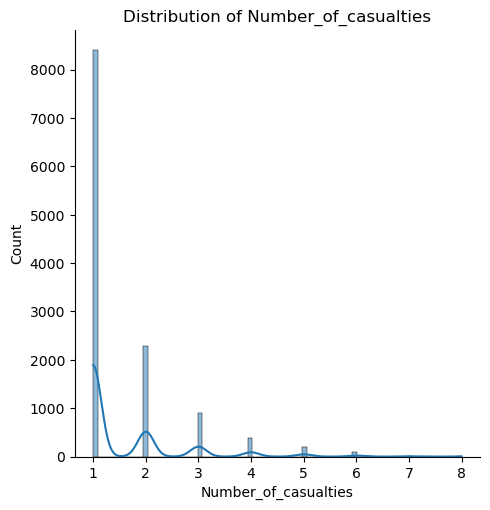

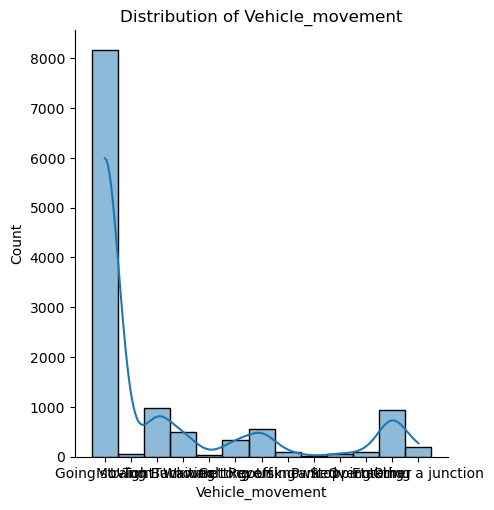

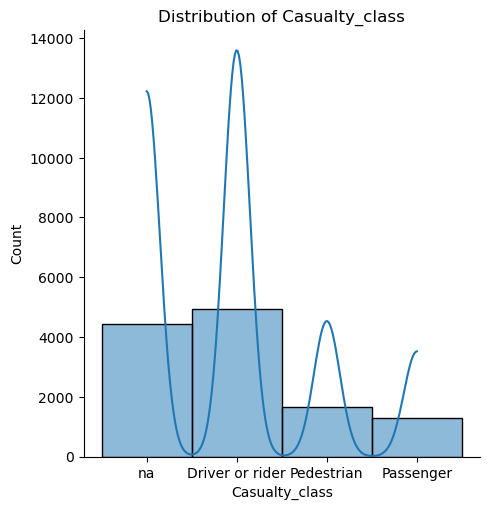

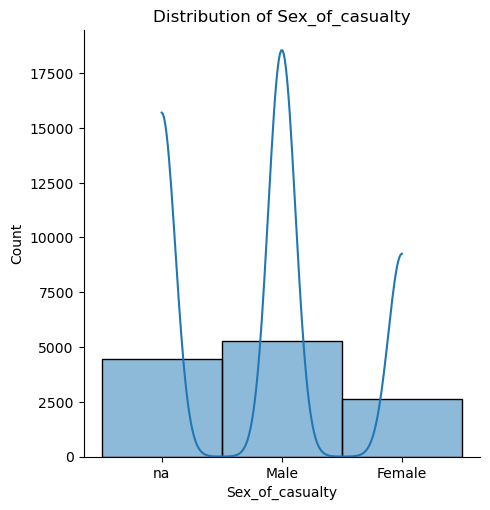

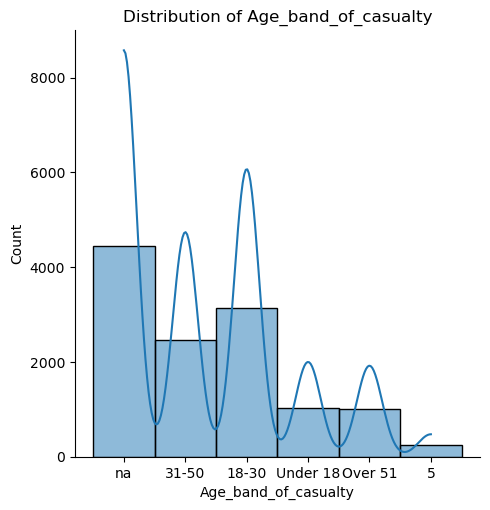

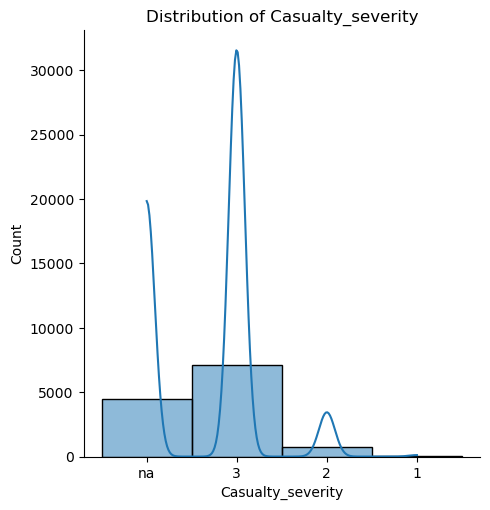

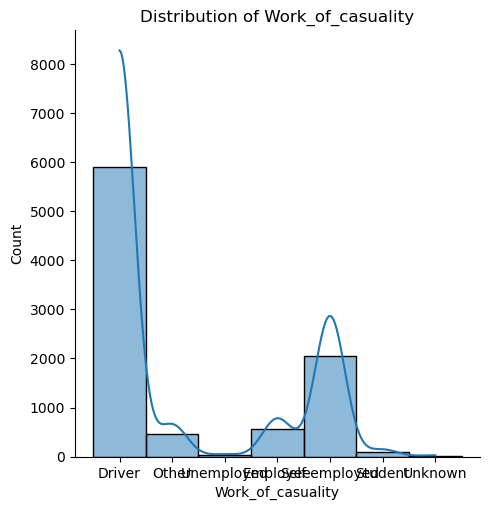

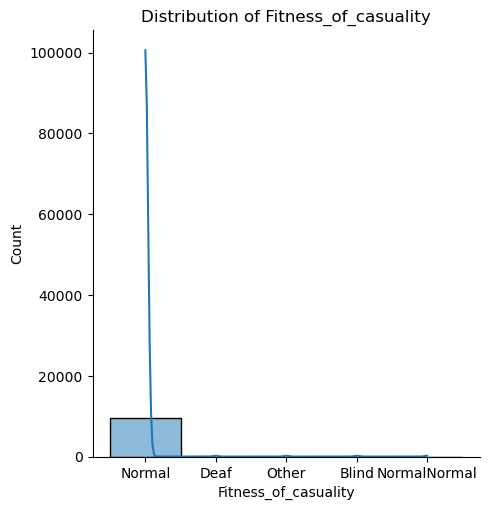

C:\Users\Precious\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


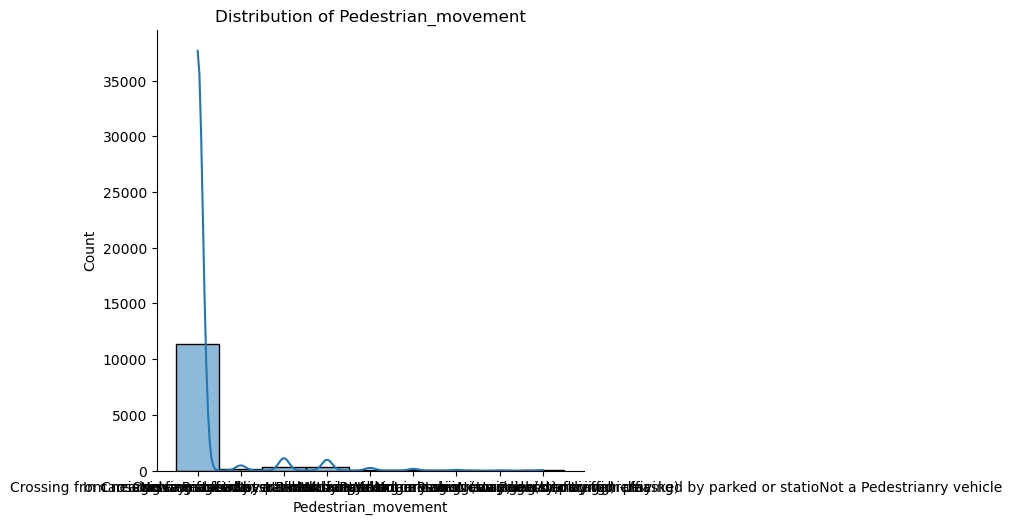

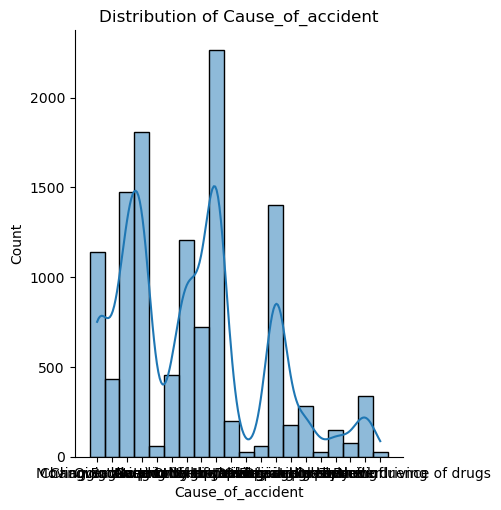

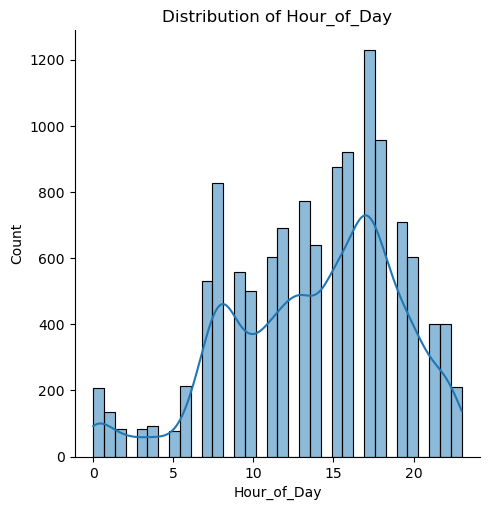

In [49]:
# Iterate over unique column names
for column_name in df.columns.unique():
    if column_name != 'Accident_severity':
        # Create a distribution plot using seaborn
        sns.displot(df[column_name], kde=True)
        plt.title(f"Distribution of {column_name}")
        plt.show()

In [50]:
df['Road_surface_type'].value_counts()

Asphalt roads                       11296
Earth roads                           358
Gravel roads                          242
Other                                 167
Asphalt roads with some distress       81
Name: Road_surface_type, dtype: int64

In [62]:
# feature selection based on visualization (to_be_continue)
features = [
    'Day_of_week', 'Number_of_vehicles_involved', 'Number_of_casualties',
    'Area_accident_occured', 'Types_of_Junction', 'Age_band_of_driver',
    'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation',
    'Type_of_vehicle', 'Driving_experience', 'Service_year_of_vehicle',
    'Type_of_collision', 'Sex_of_casualty', 'Age_band_of_casualty',
    'Cause_of_accident', 'Hour_of_Day']
len(features)

17

In [63]:
df.columns.unique()

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity', 'Hour_of_Day'],
      dtype='object')

In [64]:
# new dataframe generated
featureset_df = df[features]
featureset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Day_of_week                  12316 non-null  object
 1   Number_of_vehicles_involved  12316 non-null  int64 
 2   Number_of_casualties         12316 non-null  int64 
 3   Area_accident_occured        12077 non-null  object
 4   Types_of_Junction            11429 non-null  object
 5   Age_band_of_driver           12316 non-null  object
 6   Sex_of_driver                12316 non-null  object
 7   Educational_level            11575 non-null  object
 8   Vehicle_driver_relation      11737 non-null  object
 9   Type_of_vehicle              11366 non-null  object
 10  Driving_experience           11487 non-null  object
 11  Service_year_of_vehicle      8388 non-null   object
 12  Type_of_collision            12161 non-null  object
 13  Sex_of_casualty              12

In [65]:
target = df["Accident_severity"]
target.info()

<class 'pandas.core.series.Series'>
RangeIndex: 12316 entries, 0 to 12315
Series name: Accident_severity
Non-Null Count  Dtype 
--------------  ----- 
12316 non-null  object
dtypes: object(1)
memory usage: 96.3+ KB


In [82]:
featureset_df.isnull().sum().sort_values(ascending=False)

Service_year_of_vehicle        3928
Type_of_vehicle                 950
Types_of_Junction               887
Driving_experience              829
Educational_level               741
Vehicle_driver_relation         579
Area_accident_occured           239
Type_of_collision               155
Cause_of_accident                 0
Age_band_of_casualty              0
Sex_of_casualty                   0
Day_of_week                       0
Number_of_vehicles_involved       0
Sex_of_driver                     0
Age_band_of_driver                0
Number_of_casualties              0
Hour_of_Day                       0
dtype: int64

In [66]:
# setting input features X and target y 
X = df[features] # here features are selected from 'object' datatype
y = df["Accident_severity"]

In [67]:
# we will use pandas get_dummies method for on-hot encoding
encoded_df = pd.get_dummies(X, drop_first=True)
encoded_df.shape

(12316, 106)

In [68]:
# create labelencoder object
lb = LabelEncoder()
lb.fit(y)
y_encoded = lb.transform(y)
print("Encoded labels:",lb.classes_)

Encoded labels: ['Fatal injury' 'Serious Injury' 'Slight Injury']


In [69]:
y_en = pd.Series(y_encoded)
y_en

0        2
1        2
2        1
3        2
4        2
        ..
12311    2
12312    2
12313    1
12314    2
12315    2
Length: 12316, dtype: int32

In [70]:
fs = SelectKBest(chi2, k=50)
X_new = fs.fit_transform(encoded_df, y_en)
X_new

array([[ 2,  2, 17, ...,  0,  0,  0],
       [ 2,  2, 17, ...,  0,  1,  0],
       [ 2,  2, 17, ...,  0,  0,  0],
       ...,
       [ 1,  1, 13, ...,  0,  0,  0],
       [ 2,  1, 13, ...,  0,  0,  0],
       [ 2,  1, 13, ...,  0,  0,  0]], dtype=int64)

In [71]:
# Take the selected features
cols = fs.get_feature_names_out()
cols

array(['Number_of_vehicles_involved', 'Number_of_casualties',
       'Hour_of_Day', 'Day_of_week_Monday', 'Day_of_week_Saturday',
       'Day_of_week_Sunday', 'Area_accident_occured_  Recreational areas',
       'Area_accident_occured_ Hospital areas',
       'Area_accident_occured_ Outside rural areas',
       'Area_accident_occured_Recreational areas',
       'Area_accident_occured_Residential areas',
       'Area_accident_occured_Rural village areas',
       'Area_accident_occured_Rural village areasOffice areas',
       'Area_accident_occured_Unknown', 'Types_of_Junction_No junction',
       'Types_of_Junction_Other', 'Types_of_Junction_X Shape',
       'Age_band_of_driver_31-50', 'Age_band_of_driver_Over 51',
       'Age_band_of_driver_Under 18', 'Age_band_of_driver_Unknown',
       'Sex_of_driver_Unknown', 'Educational_level_Unknown',
       'Vehicle_driver_relation_Owner', 'Type_of_vehicle_Long lorry',
       'Type_of_vehicle_Lorry (11?40Q)',
       'Type_of_vehicle_Lorry (41?10

In [72]:
# convert selected features into dataframe
fs_df = pd.DataFrame(X_new, columns=cols)
fs_df

,Number_of_vehicles_involved,Number_of_casualties,Hour_of_Day,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Area_accident_occured_ Recreational areas,Area_accident_occured_ Hospital areas,Area_accident_occured_ Outside rural areas,Area_accident_occured_Recreational areas,...,Cause_of_accident_Driving to the left,Cause_of_accident_Improper parking,Cause_of_accident_Moving Backward,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Turnover
0,2,2,17,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2,2,17,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,2,17,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,2,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,2,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,2,1,16,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
12312,2,1,18,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
12313,1,1,13,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
12314,2,1,13,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
# Print the target classes distributions
print(y_en.value_counts())

2    10415
1     1743
0      158
dtype: int64


In [74]:
# train and test split and building baseline model to predict target features
X_trn, X_tst, y_trn, y_tst = train_test_split(
    X_new, y_en, test_size=0.2, random_state=42
)

In [75]:
# modelling using random forest baseline
rf = RandomForestClassifier(n_estimators=800, max_depth=20, random_state=42)
rf.fit(X_trn, y_trn)

RandomForestClassifier(max_depth=20, n_estimators=800, random_state=42)

In [76]:
# predicting on test data
predics = rf.predict(X_tst)
predics

array([2, 2, 2, ..., 2, 2, 2])

In [77]:
# train score 
rf.score(X_trn, y_trn)

0.9158546488022736

## Streamlit
Saving the Model

In [78]:
# selecting 7 categorical features from the dataframe
import joblib
from sklearn.preprocessing import OrdinalEncoder

new_fea_df = featureset_df[
    [
        'Type_of_collision', 'Age_band_of_driver', 'Sex_of_driver',
        'Educational_level', 'Service_year_of_vehicle', 'Day_of_week',
        'Area_accident_occured'
    ]
]

oencoder2 = OrdinalEncoder()
encoded_df3 = pd.DataFrame(oencoder2.fit_transform(new_fea_df))
encoded_df3.columns = new_fea_df.columns

# save the ordinal encoder object for inference pipeline
joblib.dump(oencoder2, "ordinal_encoder2.joblib")

['ordinal_encoder2.joblib']

In [87]:
from sklearn.impute import SimpleImputer

# final dataframe to be trained for model inference
s_final_df = pd.concat([featureset_df[
    [
        'Number_of_vehicles_involved', 'Number_of_casualties', 'Hour_of_Day'
    ]
], encoded_df3], axis=1)

# train and test split and building baseline model to predict target features
X_trn2, X_tst2, y_trn2, y_tst2 = train_test_split(
    s_final_df, y_en, test_size=0.2, random_state=42
)

# Create an imputer object
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data
imputer.fit(X_trn2)

# Transform the training and test data
X_trn2_imputed = imputer.transform(X_trn2)
X_tst2_imputed = imputer.transform(X_tst2)

# modelling using random forest baseline
rf = RandomForestClassifier(n_estimators=700, max_depth=20, random_state=42)
rf.fit(X_trn2_imputed, y_trn2)

# save the model object
joblib.dump(rf, "rta_model_deploy3.joblib", compress=9)

['rta_model_deploy3.joblib']